Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data=pd.read_csv(r'datasets_insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.3603

Check if there are missing values. If yes, handle them.

In [4]:
data.isnull().sum()
#checking if there is any null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#As we don't find any null value we will try if there are any special charecter insted of np.nan or null 
for i in data.columns:
    print({i:data[i].unique()}) #finding all the unique values

{'age': array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)}
{'sex': array(['female', 'male'], dtype=object)}
{'bmi': array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
 

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

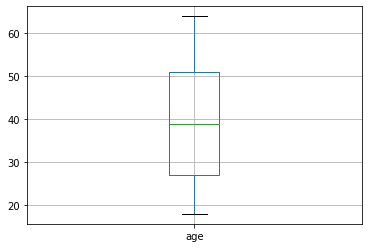

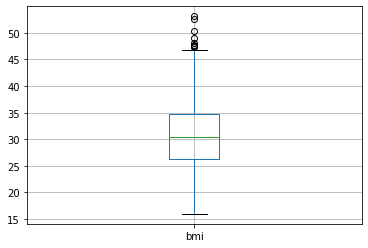

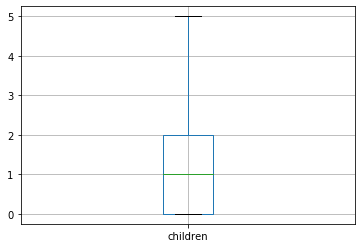

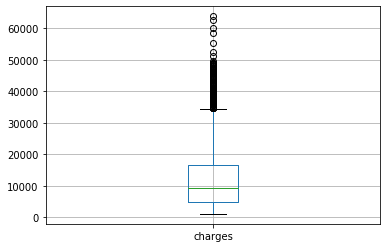

In [6]:
# check using the boxplot
columns_to_plot = ['age', 'bmi', 'children', 'charges']

for column in columns_to_plot:
    data.boxplot(column)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

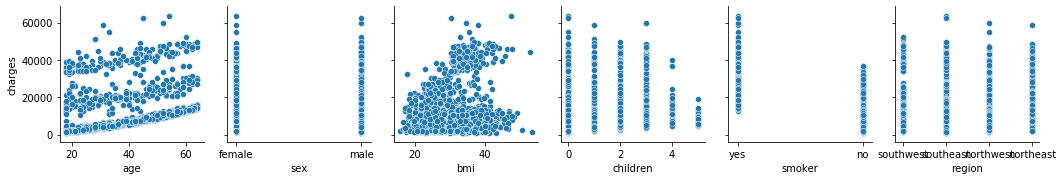

In [8]:
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
            y_vars=['charges'], kind="scatter")
plt.show()

Create X and Y

In [9]:
#we will seperate the dependent and independent variables 
X=data.loc[:,['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y=data.loc[:,'charges']

In [10]:
print(X.shape)
print(Y.shape)


(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

In [11]:
import warnings
warnings.filterwarnings("ignore")


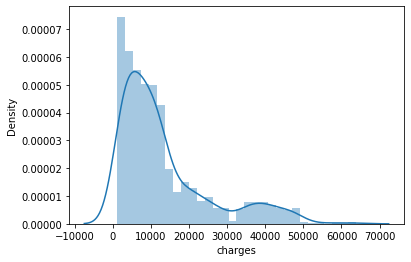

In [12]:
#distplot the dependent data to know whether it is skew or not
sns.distplot(Y)
plt.show()

In [13]:
#log transformation
Y_log=np.log(Y)

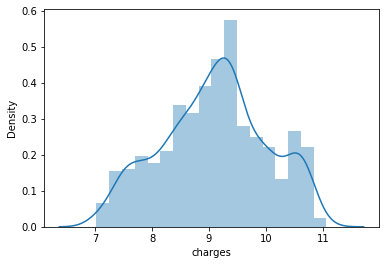

In [14]:
sns.distplot(Y_log)
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Regi
on: northeast-0,northwest-1,southeast-2,southwest-3

In [15]:
X["sex"]=X["sex"].map({'female':0,'male':1})
X["smoker"]=X["smoker"].map({"no":0,"yes":1})
X["region"]=X["region"].map({"northeast":0,"northwest":1,"southeast":2,"southwest":3})

In [16]:
X.sex

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

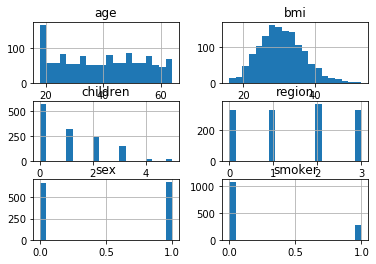

In [17]:
X.hist(bins=20)
plt.show()

In [ ]:
#data_num_skew = X.apply(lambda x: skew(x.dropna()))
#data_num_skewed = data_num_skew[(data_num_skew>0.75)| (data_num_skew < -0.75)]
 
#print(data_num_skew)
#print(data_num_skewed)

In [ ]:
#apply log+ 1 transformation for all numeric features with skewness over 0.75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


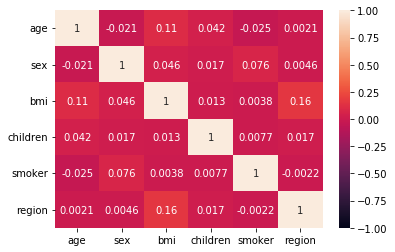

In [18]:
corr_df=X.corr(method="pearson")
print(corr_df)
  
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()
#We want values close to 0 means that is not correlated with each other

In [19]:
X.values

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)
#VIF should be low as possible
#less than 5 values is good in VIF Which represent no multicolinearity

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y_log, test_size=0.3, random_state=10)

In [22]:
print(X_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_test.shape)

(936, 6)
(402,)
(936, 6)
(402,)


In [ ]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler (Optional)

#scaler =  MinMaxScaler()
#scaler.fit(X_train)
#X_train_scale = scaler.transform(X_train)
#X_test_scale = scaler.transform(X_test)
#print(X_train_scale,X_test_scale)

Build a base Linear Regression model using sklearn.

In [23]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train, Y_train)

#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

7.042446402415639
[ 0.0352433  -0.07018148  0.0111782   0.09942699  1.56899189 -0.04278656]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [24]:
#pair the feature names with the coefficient
print(list(zip(X.columns, lm.coef_)))

[('age', 0.03524330025172184), ('sex', -0.07018148219835638), ('bmi', 0.011178196909999202), ('children', 0.09942698608802106), ('smoker', 1.5689918884084277), ('region', -0.042786564146527574)]


Predict using the model.

In [25]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.91202609  8.56894447  9.43739803  9.38706377  8.31268401  8.94047096
  9.2415172   9.63018096  8.97448562 10.54982113  8.13392381  8.28053661
  8.7786953   9.15631579  9.23496085  9.38292582  8.31732968  9.80740634
  9.19175848 10.22271157 10.54182548  8.06219616  7.97098006  8.78589234
  8.43887365  9.42945103  9.00817552  9.4410749   8.41156082 10.20315578
  7.73485623 10.38083015  8.89817667  8.96925349  8.44345347  8.87370581
  9.45013244  9.08679667  9.11044688  8.89974701  9.58911775  9.17403231
  8.55726326  9.00093224  7.98094222  8.82916407  8.94263662 10.62857798
  9.3277211   9.2600054   9.9993291   8.31379578  8.90598596  9.64115791
  9.10502318  9.38942878  9.3185899   8.62910173  8.7102396  10.70357012
  7.89124122 10.62483464 11.0905674   7.9620672  10.01160997  8.87003354
  8.48277172  8.91524868  8.87161932  8.93934335  8.83825749  7.95617944
  8.86051689  8.8991201   8.98735169  9.34095906  8.56008373  8.81795898
  7.82741573  9.33348446  9.2753835   9.18560683  9

Evaluate the model.

In [26]:
new_data=pd.DataFrame()
new_data=X_test.copy()

new_data["Actual Charges"]=Y_test
new_data["Predicted Charges"]=Y_pred
new_data=new_data.reset_index().drop("index", axis=1)
new_data


,age,sex,bmi,children,smoker,region,Actual Charges,Predicted Charges
0,37,0,27.740,3,0,1,8.893093,8.912026
1,36,0,26.885,0,0,1,8.569372,8.568944
2,59,1,37.100,1,0,3,9.421182,9.437398
3,61,0,25.080,0,0,2,10.106963,9.387064
4,29,0,26.030,0,0,1,8.225895,8.312684
...,...,...,...,...,...,...,...,...
397,49,0,23.845,3,1,0,10.090254,10.903185
398,25,0,41.325,0,0,0,9.791377,8.385468
399,39,1,29.925,1,1,0,10.019582,10.349680
400,20,1,33.330,0,0,2,7.238158,7.964127


In [27]:
from sklearn.metrics import r2_score, mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7374526728907583
RMSE: 0.4535666465554725
Adj R-square: 0.7362691387339924


In [28]:
new_data["Deviation"]=new_data["Actual Charges"]-new_data["Predicted Charges"]
new_data.to_excel("Charges Prediction.xlsx",header=True,index=True)
new_data.head()

,age,sex,bmi,children,smoker,region,Actual Charges,Predicted Charges,Deviation
0,37,0,27.740,3,0,1,8.893093,8.912026,-0.018933
1,36,0,26.885,0,0,1,8.569372,8.568944,0.000427
2,59,1,37.100,1,0,3,9.421182,9.437398,-0.016216
3,61,0,25.080,0,0,2,10.106963,9.387064,0.719899
4,29,0,26.030,0,0,1,8.225895,8.312684,-0.086789


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [29]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train, Y_train)

"""
previous values:
7.042446402415638
[ 0.0352433  -0.07018148  0.0111782   0.09942699  1.56899189 -0.04278656]
"""
#print intercept and coefficient
print(rid.intercept_)
print(rid.coef_)

7.044356761111714
[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]


In [30]:
Y_pred=rid.predict(X_test)
Y_pred

array([ 8.91335407,  8.57078681,  9.43991581,  9.38880244,  8.31454179,
        8.94217795,  9.24339444,  9.6215673 ,  8.97592143, 10.54104018,
        8.13641083,  8.28244572,  8.78151326,  9.15768361,  9.2366599 ,
        9.38470254,  8.31900567,  9.80957763,  9.1934763 , 10.21509362,
       10.53419502,  8.06409867,  7.97290355,  8.78759718,  8.44035458,
        9.43124625,  9.01055915,  9.44234709,  8.41302568, 10.1954174 ,
        7.73760631, 10.37293585,  8.89996962,  8.97171794,  8.44608736,
        8.8752063 ,  9.45287428,  9.08950214,  9.1122935 ,  8.90210938,
        9.59087726,  9.17645112,  8.55910331,  9.00281368,  7.98377939,
        8.8307809 ,  8.94525845, 10.62061119,  9.33049657,  9.26179556,
        9.99081862,  8.31563368,  8.90853092,  9.64265201,  9.10775232,
        9.39213862,  9.32026781,  8.63165809,  8.71278371, 10.6945696 ,
        7.89411978, 10.61689435, 11.0820568 ,  7.96486315, 10.0037867 ,
        8.87179149,  8.48525206,  8.91770121,  8.87319623,  8.94

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""
previous value:
R-squared: 0.7374526728907582
RMSE: 0.4535666465554726
Adj R-square: 0.7362691387339924
"""

R-squared: 0.7376888175484464
RMSE: 0.45336262346262673
Adj R-square: 0.7365063479055394


'\nprevious value:\nR-squared: 0.7374526728907582\nRMSE: 0.4535666465554726\nAdj R-square: 0.7362691387339924\n'

In [32]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train, Y_train)

"""
Ridge value:
7.044356761111712
[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]
"""
#print intercept and coefficient
print(las.intercept_)
print(las.coef_)

7.8888757936390075
[ 0.03086241  0.          0.          0.          0.         -0.        ]


In [33]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""
ridge value:
R-squared: 0.7376888175484464
RMSE: 0.45336262346262673
Adj R-square: 0.7365063479055394
"""

R-squared: 0.23329039397987605
RMSE: 0.775091121979927
Adj R-square: 0.229834152329898


'\nridge value:\nR-squared: 0.7376888175484464\nRMSE: 0.45336262346262673\nAdj R-square: 0.7365063479055394\n'

In [34]:
Y_pred=rid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""
previous value:
R-squared: 0.23329039397987605
RMSE: 0.7750911219799271
Adj R-square: 0.229834152329898
"""

R-squared: 0.7376888175484464
RMSE: 0.45336262346262673
Adj R-square: 0.7365063479055394


'\nprevious value:\nR-squared: 0.23329039397987605\nRMSE: 0.7750911219799271\nAdj R-square: 0.229834152329898\n'

Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [36]:
#creating new dataFrame and storing X_train & Y_train data into it.

new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["Charges"]=Y_train.copy()
new_df.shape

(936, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 
correlation is the relation betweeen the varilabes autocorelation is the realtion is between the observation, so whenever you have such kind of data where your observation are interdependent on each other, then linear regression algorithym is not suitable. for eg. Time Series data like stock prediction

- output range -> 0 to 4
- close to 2, no autocorrelation
- close to 4, -ve autocorrelation
- close to 0, +ve autocorrelation 

Note: If autocorrelation is Present then Perfom Time Series or Other Algorithms

In [37]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [38]:
import statsmodels.formula.api as sm

#create a fitted model with all features
lm_model = sm.ols(formula='Charges ~ age + sex + bmi + children + smoker + region',
                 data=new_df).fit()
#print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
previous values:
7.044356761111712
[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]
"""

                

Intercept    7.042446
age          0.035243
sex         -0.070181
bmi          0.011178
children     0.099427
smoker       1.568992
region      -0.042787
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     542.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.32e-299
Time:                        19:10:05   Log-Likelihood:                -559.06
No. Observations:                 936   AIC:                             1132.
Df Residuals:                     929   BIC:                             1166.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

'\nprevious values:\n7.044356761111712\n[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]\n'

Predict using the model. Evaluate the model.

In [39]:
Y_pred_new=lm_model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

"""
R-squared: 0.7376888175484464
RMSE: 0.45336262346262673
Adj R-square: 0.7365063479055394

"""

0.7374526728907579
0.4535666465554729
0.7362691387339919


'\nR-squared: 0.7376888175484464\nRMSE: 0.45336262346262673\nAdj R-square: 0.7365063479055394\n\n'

Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

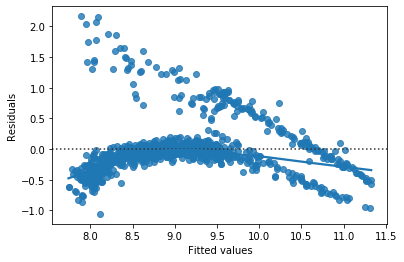

In [41]:
model_fitted_y = lm_model.fittedvalues  # This retrieves the fitted (predicted) values from the linear regression model 
sns.residplot(x=model_fitted_y, y='Charges', data=new_df, lowess=True) 
#A residual plot is a scatter plot that shows the residuals on the vertical axis and the predicted (fitted) values on 
#the horizontal axis. Residuals are the differences between the actual and predicted values.
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

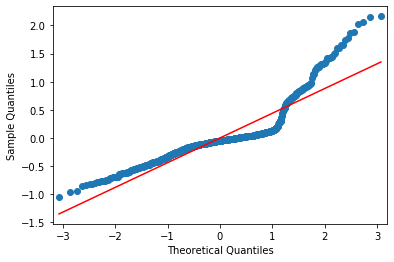

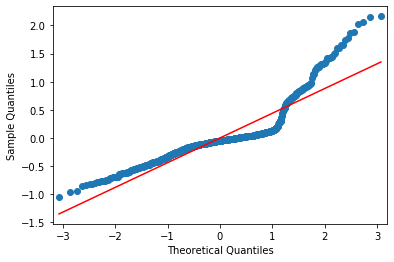

In [42]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s') #The standardized line is a line with a slope of 1 and an intercept of 0,
#and it is used as a reference to compare against the distribution of the residuals.
#A QQ plot is a graphical tool to assess whether a given dataset follows a particular theoretical distribution.
#In the context of residuals from a regression model, it helps to check if the residuals are normally distributed.
#lm_model.resid: This extracts the residuals from the linear regression model 


Check for Assumption 8-Errors should follow constant variance.<br>
Hint: Diagnostic plot

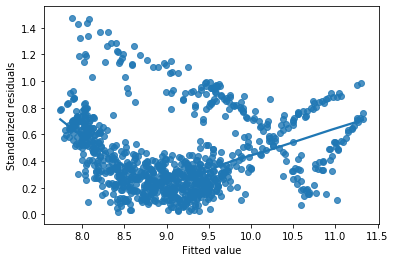

In [43]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid)) 
#This line calculates the square root of the absolute values of the residuals,
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)     
#sns.regplot(): This Seaborn function creates a scatter plot of the standardized residuals against the fitted values. 
#It also includes a lowess (locally weighted scatterplot smoothing) line to help identify trends in the data.
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()


Scale the data using Standard Scaler to prepare it for SGD.

In [44]:
?sns.regplot

In [45]:
#pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [47]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_log, test_size=0.2,
                                                    random_state=10)  


Build the SGDRegressor.

In [48]:
from sklearn.linear_model import SGDRegressor #Stochastic Gradient Descent (SGD)

lm = SGDRegressor(learning_rate="constant",  
# This specifies that a constant learning rate is used throughout the training process. 
# Other options include "optimal" (adaptive learning rate based on a heuristic) and 
#"invscaling" (gradually decreasing learning rate).
                  eta0=0.1,  #This is the initial learning rate. It's the step size used to update the model
                             #parameters during each iteration.
                  shuffle=True, 
        # It introduces randomness and helps the algorithm to explore different parts of the loss landscape.
                  random_state=10, #set seed
                  max_iter=1000, #This sets the maximum number of iterations (epochs) that the algorithm will run.
                  early_stopping=True,
                  # If set to True, training will stop when the score (e.g., the loss) is not improving.
                  #It's a form of regularization that prevents overfitting.
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping,If the score doesn't improve for this many consecutive
        #epochs,training will stop.
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
7.044356761111712
[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]
"""


[9.09358862]
[ 0.35102586 -0.14693724  0.43349556 -0.00081673  0.43827899 -0.20248566]


'\nprevious values:\n7.044356761111712\n[ 0.03524083 -0.06922454  0.01118039  0.09925573  1.55870554 -0.04282443]\n'

Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [49]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.46524735005491447
0.6572916021765496
0.462836744570564


Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [50]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], 
                           "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],
                           "smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}
X_test_sample=pd.DataFrame(sample_data)
X_test_sample


,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [51]:
Y_pred_sample=rid.predict(X_test_sample)
Y_pred=np.exp(Y_pred_sample)
Y_pred

array([45723.73399466,  8108.11331438, 28731.22202506, 14571.18484423,
        7910.30349119,  7517.6327568 , 10752.06017639])

Save the predicted values along with the observations into an excel file.

In [52]:
X_test_sample['charges']=Y_pred
print(X_test_sample)

   age  sex     bmi  children  smoker  region       charges
0   56    1  19.950         0       1       0  45723.733995
1   51    0  18.050         0       0       1   8108.113314
2   31    1  34.390         3       1       1  28731.222025
3   64    1  25.600         2       0       3  14571.184844
4   44    0  23.980         2       0       2   7910.303491
5   43    1  32.600         2       0       3   7517.632757
6   56    1  33.725         0       0       1  10752.060176


In [54]:
X_test_sample.to_excel("Predicted_Values.xlsx",header=True,index=True)